CycleGAN Results Visualization
==============

Plot Simple Results
-------

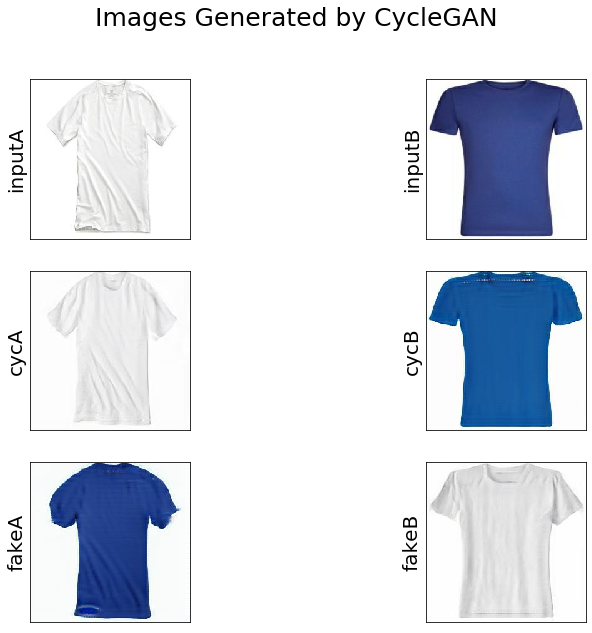

In [18]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# DIR_PATH만 바꾸는 것을 추천합니다. 
DIR_PATH = 'C:\\Users\\default.DESKTOP-S5Q9GAA\\Documents\\Programs\\study_datascience\\GAN-Notes\\images\\sucess\\train'
img_list = ['0_10_inputA.jpg', '0_10_inputB.jpg', '49_10_cycA.jpg',
            '49_10_cycB.jpg', '49_10_fakeA.jpg', '49_10_fakeB.jpg']

def image_in(img_list, DIR_PATH = DIR_PATH):
    new_img_list = []
    for img_name in img_list:
        if img_name not in os.listdir():
            new_img_list.append(DIR_PATH + '/' + img_name)
    return new_img_list

def plot_simple_results(img_list, filename, figsize=(13, 10), DIR_PATH = DIR_PATH, 
                        title = 'Images Generated by CycleGAN'):
    img_list = image_in(img_list, DIR_PATH=DIR_PATH)
    plt.figure(figsize=figsize)
    plt.suptitle(title, fontsize = 25)
    for i, img_name in enumerate(img_list):
        img = np.array(Image.open(img_name))
        plt.subplot(str(len(img_list) // 2) + str(2) + str(i+1))
        plt.ylabel(img_name.split('/')[1].split('_')[2].split('.')[0], fontsize=20)
        plt.imshow(img)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename + '.jpg')


plot_simple_results(img_list, 'Images-Generated-by-CycleGAN')

Plot Process Results
-------------

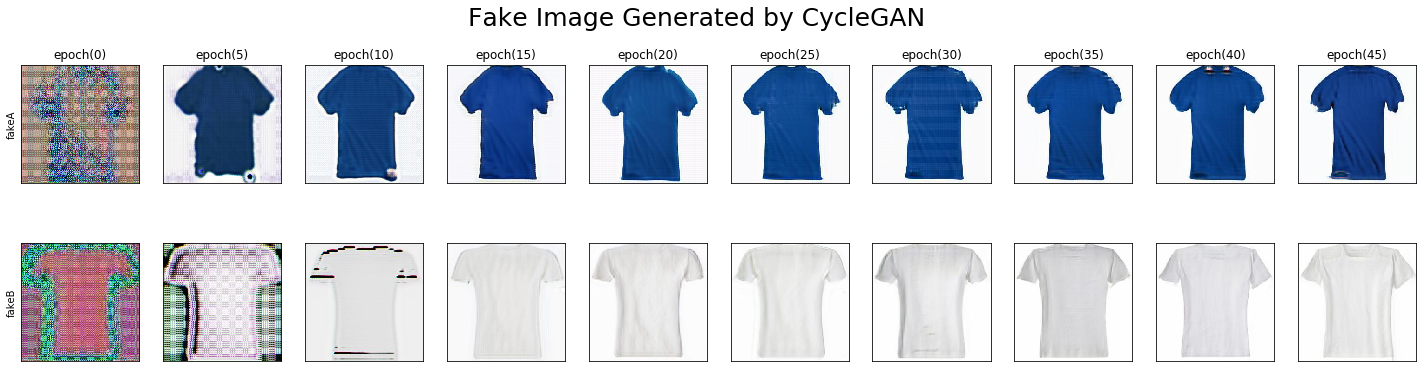

In [22]:
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# DIR_PATH만 바꾸는 것을 추천합니다. 
init_list = ['A', 'B']
DIR_PATH = 'C:\\Users\\default.DESKTOP-S5Q9GAA\\Documents\\Programs\\study_datascience\\GAN-Notes\\images\\sucess\\train'

def plot_process_results(filename, num_rows = 2, num_cols = 10, figsize = (25, 6), 
                         title = 'Title', fontsize = 25,
                        DIR_PATH = DIR_PATH, epoch = 5, init_list = ['A', 'B'], img_name = 'fake'):
    fig, ax = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.suptitle(title, fontsize = fontsize)
    for i in range(num_rows):
        for k in range(0, num_cols):
            img = mpimg.imread(DIR_PATH + '/' + str(k*epoch) + '_10_' + img_name + init_list[i] + '.jpg')
            ax[i, k].imshow(img)
            if i == 0:
                ax[i, k].set_title('epoch(' + str(k*epoch) + ')')
            ax[i, 0].set(ylabel=img_name + init_list[i])
            plt.setp(ax[i, k].get_xticklabels(), visible=False)
            plt.setp(ax[i, k].get_yticklabels(), visible=False)
            ax[i, k].tick_params(axis='both', which='both', length=0)
    plt.savefig(filename + '.jpg')
    
plot_process_results('fake_image_by_cyclegan', title = 'Fake Image Generated by CycleGAN')

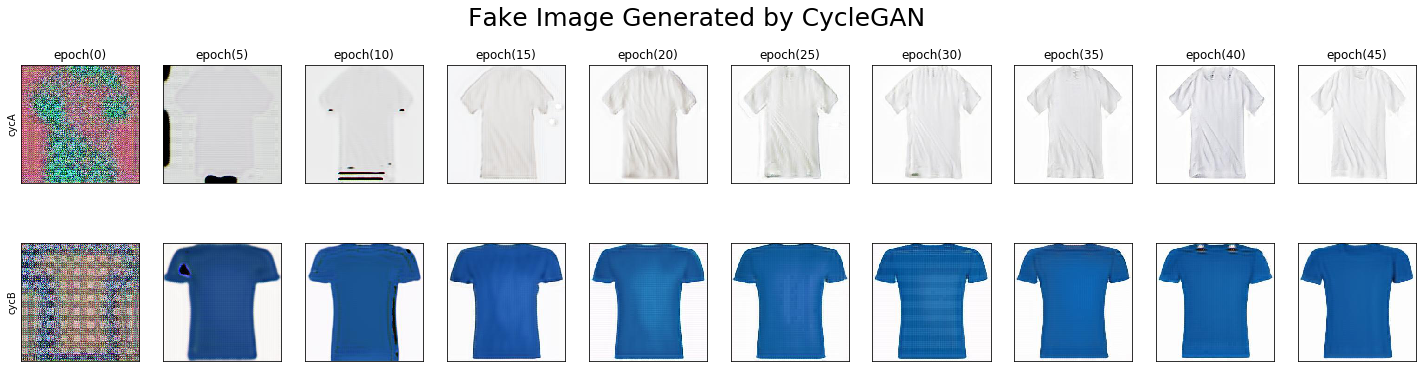

In [21]:
plot_process_results('cycle_image_by_cyclegan', title = 'Input Image Restored by CycleGAN', img_name = 'cyc')